# HAPPY OR SAD ?

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


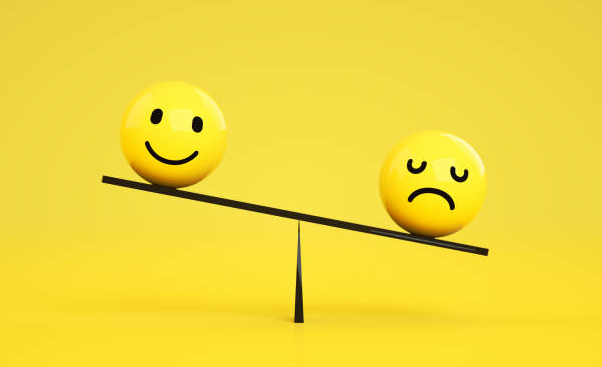

This CNN project focuses on classifying emotions, specifically "happy" or "sad," from facial images. By leveraging the power of Convolutional Neural Networks, the model learns to recognize subtle patterns in facial expressions, making it effective at distinguishing between different emotional states. Emotion recognition is crucial in applications such as mental health monitoring, customer experience enhancement, and human-computer interaction. This project aims to develop a system that can analyze images in real-time, offering valuable insights into human emotions. The model can be applied to fields like healthcare, robotics, and personalized assistants for improved user engagement.

**1. Loading necessary libraries**

In [ ]:
import pandas as pd
from skimage.transform import resize
from skimage.io import imread
import os
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D,Dense,MaxPool2D,Flatten

**2. Loading data**

In [ ]:
X = []
y = []
categories = ['happy', 'sad']
datadir = "/content/drive/MyDrive/PROJECTS/Project-CNN/data"
for category in categories:
    path = os.path.join(datadir, category)
    images = os.listdir(path)
    for img in images:
        imgpath = os.path.join(path, img)
        try:
            img_array = imread(imgpath)
            if len(img_array.shape) == 2:
                img_array = np.stack([img_array] * 3, axis=-1)
            elif img_array.shape[-1] == 4:
                img_array = img_array[..., :3]
            img_resized = resize(img_array, (150, 150, 3))
            if img_resized.shape != (150, 150, 3):
                print(f"Image shape is incorrect: {img_resized.shape} at {imgpath}")
            else:
                X.append(img_resized)
                y.append(categories.index(category))
        except Exception as e:
            print(f"Error loading image {imgpath}: {e}")
    print("Loaded", category)
X = np.array(X)
y = np.array(y)


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Loaded happy
Loaded sad


**3. Splitting data for training and testing**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=1)

**4. Model buiding**

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(150,150,3),activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Conv2D(32,(3,3),input_shape=(150,150,3),activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(units=100,activation='relu'))
model.add(Dense(units=4,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,epochs=15,batch_size=12)

Epoch 1/15
116/116 ━━━━━━━━━━━━━━━━━━━━ 40s 331ms/step - accuracy: 0.5070 - loss: 1.4553
Epoch 2/15
116/116 ━━━━━━━━━━━━━━━━━━━━ 39s 321ms/step - accuracy: 0.6350 - loss: 0.6475
Epoch 3/15
116/116 ━━━━━━━━━━━━━━━━━━━━ 44s 346ms/step - accuracy: 0.6540 - loss: 0.6038
Epoch 4/15
116/116 ━━━━━━━━━━━━━━━━━━━━ 39s 325ms/step - accuracy: 0.7959 - loss: 0.4524
Epoch 5/15
116/116 ━━━━━━━━━━━━━━━━━━━━ 44s 351ms/step - accuracy: 0.8383 - loss: 0.3516
Epoch 6/15
116/116 ━━━━━━━━━━━━━━━━━━━━ 38s 330ms/step - accuracy: 0.8778 - loss: 0.2687
Epoch 7/15
116/116 ━━━━━━━━━━━━━━━━━━━━ 44s 356ms/step - accuracy: 0.9292 - loss: 0.1933
Epoch 8/15
116/116 ━━━━━━━━━━━━━━━━━━━━ 79s 329ms/step - accuracy: 0.9541 - loss: 0.1644
Epoch 9/15
116/116 ━━━━━━━━━━━━━━━━━━━━ 43s 341ms/step - accuracy: 0.9661 - loss: 0.0974
Epoch 10/15
116/116 ━━━━━━━━━━━━━━━━━━━━ 41s 342ms/step - accuracy: 0.9822 - loss: 0.0964
Epoch 11/15
116/116 ━━━━━━━━━━━━━━━━━━━━ 43s 359ms/step - accuracy: 0.9902 - loss: 0.0565
Epoch 12/15
116/116

In [ ]:
model.evaluate(X_test,y_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 311ms/step - accuracy: 0.5886 - loss: 2.4396


[2.4552347660064697, 0.6046901345252991]

In [ ]:
# img=imread("/content/test2.png")
# img

In [ ]:
# img=resize(img,(150,150,3))
# img.shape

In [ ]:
# img=img.reshape(1,150,150,3)
# img.shape

In [ ]:
# y_new=model.predict(img)
# ind=y_new.argmax()
# categories[ind]

In [ ]:
# model.save('model_cnn.h5')